## Train a 4 Layer Neural Network with Pima Diabetes Dataset


In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
model = Sequential()
model.add(Dense(16,input_dim = x_train.shape[1],activation='relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense (1,activation = 'sigmoid'))
model.compile(optimizer ='adam' , loss ='binary_crossentropy', metrics =['accuracy'])

C:\python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history = model.fit(x_train, y_train, epochs=100, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6611 - loss: 10.9067 - val_accuracy: 0.6429 - val_loss: 2.3177
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6527 - loss: 1.2884 - val_accuracy: 0.6688 - val_loss: 0.8193
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6686 - loss: 0.6290 - val_accuracy: 0.6364 - val_loss: 0.7620
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6723 - loss: 0.6199 - val_accuracy: 0.6883 - val_loss: 0.7160
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6723 - loss: 0.6489 - val_accuracy: 0.6818 - val_loss: 0.7010
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6903 - loss: 0.6127 - val_accuracy: 0.7013 - val_loss: 0.6843
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7369 - loss: 0.5663 - val_accuracy: 0.6948 - val_loss: 0.6848
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6910 - loss: 0.5884 - val_accuracy: 0.6883 - 

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy of Neural Network: 75.97%


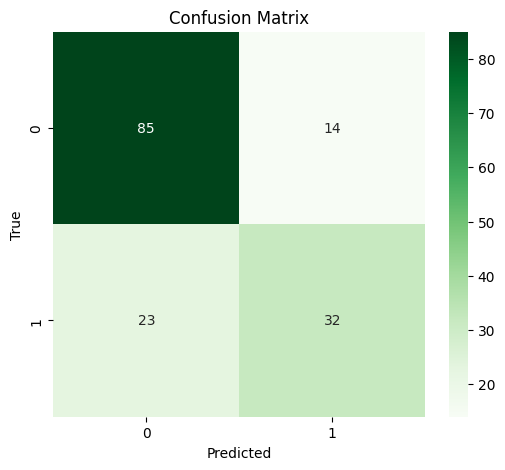

In [8]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy of Neural Network: {accuracy*100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot = True, fmt = "d", cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()